In [5]:
!pip install pytesseract

  Using cached pytesseract-0.3.13-py3-none-any.whl.metadata (11 kB)
Using cached pytesseract-0.3.13-py3-none-any.whl (14 kB)


In [9]:
# 간단한 Tesseract 테스트
import pytesseract
from PIL import Image, ImageDraw, ImageFont

print("=== 간단한 Tesseract 테스트 ===")

# 1. pytesseract 임포트 확인
print("1. pytesseract 임포트:", "성공" if 'pytesseract' in globals() else "실패")

# 2. Tesseract 경로 설정 (필요한 경우)
pytesseract.pytesseract.tesseract_cmd = r'C:\Program Files\Tesseract-OCR\tesseract.exe'

# 3. 간단한 텍스트 이미지 생성
print("2. 이미지 생성 중...")
img = Image.new('RGB', (300, 100), color='white')
draw = ImageDraw.Draw(img)

# 텍스트 그리기
try:
    font = ImageFont.truetype("arial.ttf", 30)
except:
    font = ImageFont.load_default()

draw.text((50, 30), "Hello World", fill='black', font=font)

# 4. OCR 테스트
print("3. OCR 테스트 중...")
try:
    text = pytesseract.image_to_string(img)
    print(f"✅ 성공! 인식된 텍스트: '{text.strip()}'")
except Exception as e:
    print(f"❌ 실패: {e}")

print("=== 테스트 완료 ===")

=== 간단한 Tesseract 테스트 ===
1. pytesseract 임포트: 성공
2. 이미지 생성 중...
3. OCR 테스트 중...
✅ 성공! 인식된 텍스트: 'Hello World'
=== 테스트 완료 ===


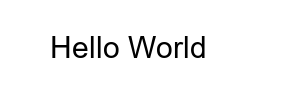

In [11]:
img

In [19]:
#!/usr/bin/env python3
"""
Tesseract OCR 테스트 스크립트
"""

import pytesseract
from PIL import Image
import os
import sys

print("=== Tesseract 설치 테스트 ===")

# 1. pytesseract 임포트 테스트
try:
    import pytesseract
    print("✅ pytesseract 임포트 성공")
except Exception as e:
    print(f"❌ pytesseract 임포트 실패: {e}")

# 2. Tesseract 실행파일 경로 확인
print("\n=== Tesseract 실행파일 경로 확인 ===")

# 기본 경로들 확인
possible_paths = [
    r"C:\Program Files\Tesseract-OCR\tesseract.exe",
    r"C:\Program Files (x86)\Tesseract-OCR\tesseract.exe",
    r"C:\Users\wq240\AppData\Local\Programs\Tesseract-OCR\tesseract.exe"
]

tesseract_found = False
for path in possible_paths:
    if os.path.exists(path):
        print(f"✅ Tesseract 발견: {path}")
        pytesseract.pytesseract.tesseract_cmd = path
        tesseract_found = True
        break

if not tesseract_found:
    print("❌ Tesseract 실행파일을 찾을 수 없습니다.")
    print("설치된 경로를 확인해주세요.")

# 3. Tesseract 버전 확인
print("\n=== Tesseract 버전 확인 ===")
try:
    version = pytesseract.get_tesseract_version()
    print(f"✅ Tesseract 버전: {version}")
except Exception as e:
    print(f"❌ Tesseract 버전 확인 실패: {e}")

# 4. 사용 가능한 언어 확인
print("\n=== 사용 가능한 언어 확인 ===")
try:
    languages = pytesseract.get_languages()
    print(f"✅ 사용 가능한 언어: {languages}")
except Exception as e:
    print(f"❌ 언어 목록 확인 실패: {e}")

# 5. 간단한 OCR 테스트 (텍스트 이미지가 있는 경우)
print("\n=== OCR 기능 테스트 ===")

# PIL을 사용해서 간단한 텍스트 이미지 생성
try:
    from PIL import Image, ImageDraw, ImageFont
    import numpy as np
    
    # 간단한 텍스트 이미지 생성
    img = Image.new('RGB', (200, 50), color='white')
    draw = ImageDraw.Draw(img)
    
    # 기본 폰트 사용
    try:
        # Windows 기본 폰트
        font = ImageFont.truetype("NanumGothic.ttf", 20)
    except:
        # 폰트가 없으면 기본 폰트 사용
        font = ImageFont.load_default()
    
    draw.text((10, 10), "Hello World", fill='black', font=font)
    
    # OCR 테스트
    text = pytesseract.image_to_string(img)
    print(f"✅ OCR 테스트 성공!")
    print(f"인식된 텍스트: '{text.strip()}'")
    
except Exception as e:
    print(f"❌ OCR 테스트 실패: {e}")

print("\n=== 테스트 완료 ===")

def test_tesseract():
    """Tesseract 설치 확인 및 테스트"""
    
    print("🔍 Tesseract 설치 확인 중...")
    
    try:
        # Tesseract 버전 확인
        version = pytesseract.get_tesseract_version()
        print(f"✅ Tesseract 버전: {version}")
        
        # Tesseract 경로 확인
        path = pytesseract.pytesseract.tesseract_cmd
        print(f"📍 Tesseract 경로: {path}")
        
        # 사용 가능한 언어 확인
        langs = pytesseract.get_languages()
        print(f"🌍 사용 가능한 언어: {langs}")
        
        # 한국어 지원 확인
        if 'kor' in langs or 'kor+eng' in langs:
            print("✅ 한국어 지원 확인됨!")
        else:
            print("⚠️ 한국어 언어팩이 설치되지 않았을 수 있습니다.")
        
        return True
        
    except Exception as e:
        print(f"❌ Tesseract 오류: {e}")
        return False

def test_image_ocr():
    """이미지 OCR 테스트"""
    
    print("\n📸 이미지 OCR 테스트...")
    
    # 테스트용 간단한 이미지 생성 (텍스트가 있는 이미지가 있다면 그것을 사용)
    try:
        # PIL로 간단한 텍스트 이미지 생성
        from PIL import Image, ImageDraw, ImageFont
        
        # 400x100 크기의 흰색 이미지 생성
        img = Image.new('RGB', (400, 100), color='white')
        draw = ImageDraw.Draw(img)
        
        # 기본 폰트 사용
        try:
            font = ImageFont.truetype("NanumGothic.ttf", 20)
        except:
            font = ImageFont.load_default()
        
        # 텍스트 그리기
        text = "Hello World! 안녕하세요!"
        draw.text((10, 30), text, fill='black', font=font)
        
        # 이미지 저장
        img.save("test_image.png")
        print("✅ 테스트 이미지 생성됨: test_image.png")
        
        # OCR 실행
        result = pytesseract.image_to_string(img, lang='eng+kor')
        print(f"📝 OCR 결과: {result.strip()}")
        
        # 파일에서도 테스트
        result_file = pytesseract.image_to_string("test_image.png", lang='eng+kor')
        print(f"📄 파일 OCR 결과: {result_file.strip()}")
        
        return True
        
    except Exception as e:
        print(f"❌ 이미지 OCR 테스트 오류: {e}")
        return False

=== Tesseract 설치 테스트 ===
✅ pytesseract 임포트 성공

=== Tesseract 실행파일 경로 확인 ===
✅ Tesseract 발견: C:\Program Files\Tesseract-OCR\tesseract.exe

=== Tesseract 버전 확인 ===
✅ Tesseract 버전: 5.5.0.20241111

=== 사용 가능한 언어 확인 ===
✅ 사용 가능한 언어: ['eng', 'kor', 'osd']

=== OCR 기능 테스트 ===
✅ OCR 테스트 성공!
인식된 텍스트: 'Helloworld'

=== 테스트 완료 ===


In [21]:
def test_pdf_ocr():
    """PDF OCR 테스트"""
    
    print("\n📄 PDF OCR 테스트...")
    
    try:
        # pdf2image로 PDF를 이미지로 변환
        from pdf2image import convert_from_path
        
        # 테스트용 PDF가 있는지 확인
        test_pdfs = ["test.pdf", "sample.pdf", "document.pdf"]
        
        for pdf_file in test_pdfs:
            if os.path.exists(pdf_file):
                print(f"📖 {pdf_file} 발견! OCR 테스트 중...")
                
                # PDF를 이미지로 변환
                images = convert_from_path(pdf_file)
                
                for i, image in enumerate(images):
                    print(f"페이지 {i+1} OCR 결과:")
                    result = pytesseract.image_to_string(image, lang='eng+kor')
                    print(result[:200] + "..." if len(result) > 200 else result)
                
                return True
        
        print("ℹ️ 테스트용 PDF 파일이 없습니다. (test.pdf, sample.pdf, document.pdf 중 하나를 준비해주세요)")
        return False
        
    except ImportError:
        print("❌ pdf2image가 설치되지 않았습니다.")
        return False
    except Exception as e:
        print(f"❌ PDF OCR 테스트 오류: {e}")
        return False

if __name__ == "__main__":
    print("🚀 Tesseract OCR 테스트 시작")
    print("=" * 50)
    
    # 기본 테스트
    if test_tesseract():
        # 이미지 OCR 테스트
        test_image_ocr()
        
        # PDF OCR 테스트
        test_pdf_ocr()
    
    print("\n" + "=" * 50)
    print("🎉 테스트 완료!")
    print("📋 다음 단계:")
    print("1. 실제 PDF 파일로 테스트")
    print("2. 한국어 텍스트 추출 테스트")
    print("3. PDF 문서 유사성 분석 프로젝트 시작") 

🚀 Tesseract OCR 테스트 시작
🔍 Tesseract 설치 확인 중...
✅ Tesseract 버전: 5.5.0.20241111
📍 Tesseract 경로: C:\Program Files\Tesseract-OCR\tesseract.exe
🌍 사용 가능한 언어: ['eng', 'kor', 'osd']
✅ 한국어 지원 확인됨!

📸 이미지 OCR 테스트...
✅ 테스트 이미지 생성됨: test_image.png
📝 OCR 결과: Hello World! aa!
📄 파일 OCR 결과: Hello World! aa!

📄 PDF OCR 테스트...
❌ pdf2image가 설치되지 않았습니다.

🎉 테스트 완료!
📋 다음 단계:
1. 실제 PDF 파일로 테스트
2. 한국어 텍스트 추출 테스트
3. PDF 문서 유사성 분석 프로젝트 시작
